# 线性SVM决策可视化过程

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification, load_breast_cancer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
import datetime
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 可视化数据集


([], [])

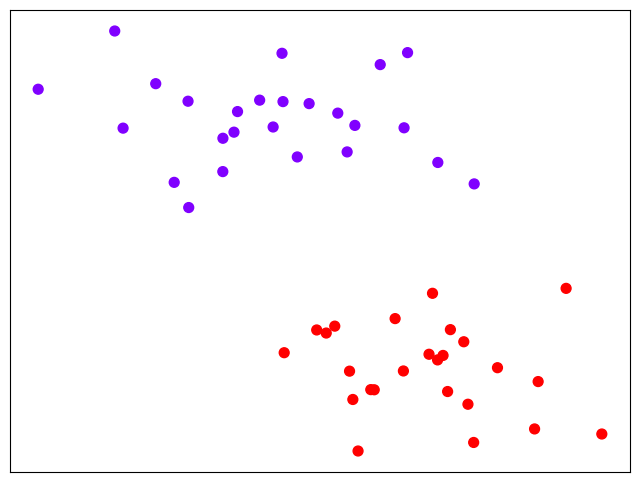

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))

x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap='rainbow')
plt.xticks([])
plt.yticks([])


In [126]:
# a = np.array([1, 2, 3])
# b = np.array([7, 8])

# v1, v2 = np.meshgrid(a, b)

# v = np.vstack([v1.ravel(), v2.ravel()]).T

# a, b, v1, v2, v

In [3]:


## 制作网格

# 获取坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

axisX, axisY = np.meshgrid(axisx, axisy)

xy = np.vstack([axisX.ravel(), axisY.ravel()]).T

# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel='linear').fit(x, y)
z = clf.decision_function(xy).reshape(axisX.shape)
# decision_function 返回每个输入的样本所对应的到决策边界的距离
# 然后再讲这个距离转换为axisx的结构，这是由于画图的comtour函数要求zz的结构必须与x和y保持一致

# plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap='rainbow')

# 画决策边界和平行于决策边界的超平面
ax.contour(axisX, axisY, z
           , colors = 'k'
           , levels = [-1, 0, 1]  # 画三条等高线，分别是z为-1,0,1的三条线
           , alpha = 0.5  # 透明度
           , linestyles = ['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)


(-0.41872382476349596, 5.754870487889891)

In [4]:

plt.show()
# vscode不知道为什么画不出来图 代码没问题 可以用pycharm画出来

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_8912\2379283017.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[10, 0], x[10, 1], c= 'black', s = 50, cmap = 'rainbow')


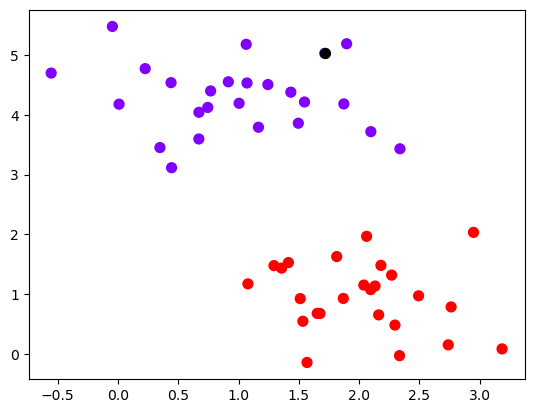

In [5]:

# 用一个点来试试看
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')
plt.scatter(x[10, 0], x[10, 1], c= 'black', s = 50, cmap = 'rainbow')

In [6]:

clf.decision_function(x[10].reshape(1, 2))


array([-3.33917354])

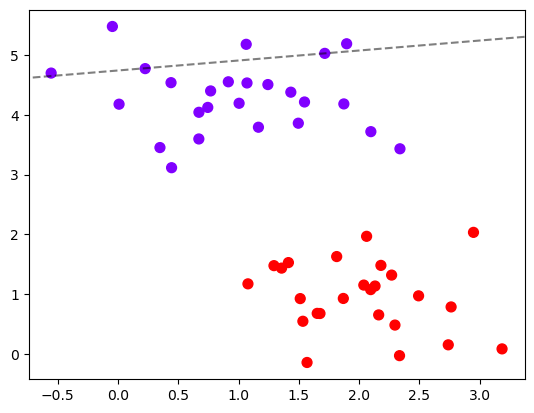

In [7]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')
ax = plt.gca()
ax.contour(axisx, axisy, z
           , colors = 'k'
           , levels = [-3.33917354]  
           , alpha = 0.5
           , linestyles = ['--'])

In [8]:
# 将上述过程包装成函数
def plot_svc_decision_function(model, ax = None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

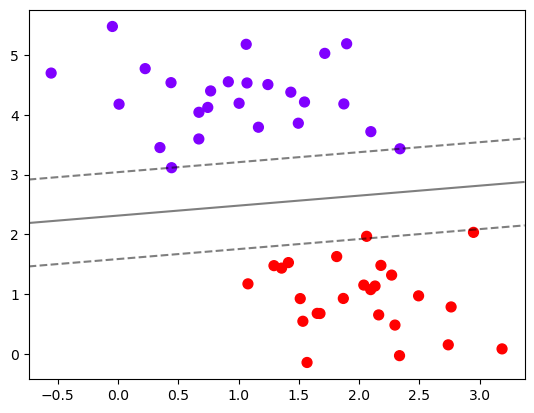

In [9]:
# 整个绘图过程
clf = SVC(kernel='linear').fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')
plot_svc_decision_function(clf)

### 探索建立好的模型

In [10]:
clf.predict(x)
# 根据决策边界，对x中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [11]:
clf.score(x, y)
# 返回给定测试数据和标签的平均准确度

1.0

In [12]:
clf.support_vectors_
# 返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [13]:
clf.n_support_
# 返回每个类中支持向量的个数

array([2, 1])

### 非线性SVM与核函数

| 输入      | 含义    | 解决问题   | 核函数的表达式                       | 参数 gamma | 参数 degree | 参数coef0 |
| :-------- | :------ | :--------- | :----------------------------------- | :--------- | :---------- | :---- |
| "linear"  | 线性核  | 线性       | $K(x,y) = x^T \cdot y = x \cdot y$   | No         | No          | No    |
| "poly"    | 多项式核 | 偏线性     | $K(x,y) = (\gamma(x \cdot y) + r)^d$ | Yes        | Yes         | Yes   |
| "sigmoid" | 双曲正切核 | 非线性     | $K(x,y) = tanh(\gamma(x \cdot y) + r)$ | Yes        | No          | Yes   |
| "rbf"     | 高斯径向基 | 偏非线性   | $K(x,y) = e^{-\gamma\|x-y\|^2}, \gamma > 0$ | Yes        | No          | No    |

#### 示例

In [14]:
from sklearn.datasets import make_circles

x, y = make_circles(100, factor=0.1, noise = 0.1)
x, x.shape

(array([[-1.46112692e-02,  2.24539341e-01],
        [ 5.98160342e-02,  8.66105670e-01],
        [-1.23242033e-01, -2.73806200e-01],
        [ 1.35625944e-01,  7.14791347e-02],
        [ 1.84902083e-01,  5.69782049e-02],
        [ 2.85423926e-01,  8.50506964e-01],
        [ 6.10320162e-01, -8.27046053e-01],
        [ 5.48957499e-02, -1.13990431e-01],
        [ 1.08768504e+00, -2.30825165e-01],
        [-1.47503332e-01, -9.09964248e-02],
        [ 6.87573280e-01, -5.84317763e-01],
        [ 1.85452206e-01, -9.94313757e-01],
        [ 8.52428577e-01,  1.85184296e-01],
        [-5.68555509e-01, -5.72674813e-01],
        [ 7.07367714e-01,  8.13297572e-01],
        [ 2.14150560e-02, -2.64203110e-01],
        [ 1.59811632e-01, -7.24477012e-03],
        [-1.73184387e-01,  1.81720367e-02],
        [ 8.40999766e-01, -5.32669829e-01],
        [-6.42680206e-02, -1.55602574e-01],
        [ 6.89838146e-02, -7.45846681e-02],
        [-5.33049602e-01,  8.63752585e-01],
        [ 7.42449267e-02,  2.315

In [15]:
y, y.shape

(array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64),
 (100,))

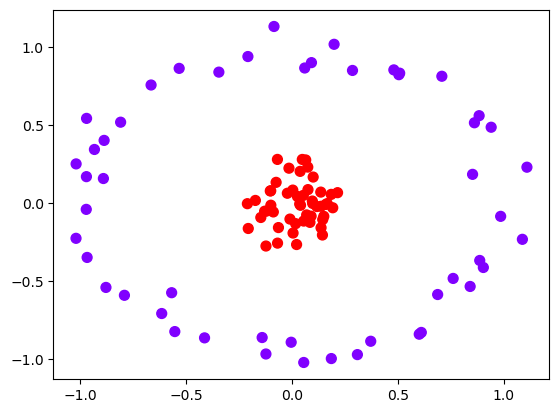

In [16]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')
plt.show()

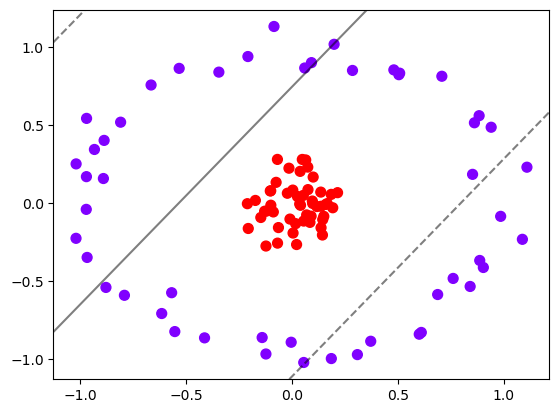

In [17]:
# 用我们已经定义的函数来划分这个数据的决策边界
clf = SVC(kernel='linear').fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')
plot_svc_decision_function(clf)

# 无法找出一条直线分类这个样本

In [18]:
clf.score(x, y)

0.67

In [ ]:
# 为线性数据增加维度并绘制3D图像
r = np.exp(-(x**2).sum(1))
rlim = np.arange(min(r), max(r) + 0.2, 0.2)
r, rlim, r.shape

(array([0.950629  , 0.47061403, 0.9137864 , 0.9767704 , 0.96325674,
        0.44716442, 0.34767196, 0.98412008, 0.2904456 , 0.97040906,
        0.44300055, 0.35949595, 0.46723277, 0.52141354, 0.31291552,
        0.93214967, 0.97473246, 0.97013208, 0.37119871, 0.97205534,
        0.98973145, 0.35693185, 0.94256974, 0.98294248, 0.9400129 ,
        0.45298942, 0.37344983, 0.99824207, 0.98969933, 0.95775058,
        0.37172226, 0.33457092, 0.39660007, 0.98986787, 0.9954043 ,
        0.99867428, 0.44095496, 0.976657  , 0.39604679, 0.37475896,
        0.99746491, 0.9891458 , 0.33584568, 0.98678648, 0.35266534,
        0.39905276, 0.96428739, 0.39867054, 0.27707584, 0.98284592,
        0.38685233, 0.98520147, 0.95048968, 0.3880447 , 0.40110867,
        0.41595819, 0.97815457, 0.34758054, 0.99289797, 0.91977294,
        0.95645884, 0.99056976, 0.93254119, 0.9576883 , 0.97095918,
        0.34551857, 0.29026027, 0.98591715, 0.38269513, 0.37628057,
        0.34522408, 0.93349285, 0.96871617, 0.46

In [20]:
from mpl_toolkits import mplot3d

In [21]:
# 定义一个绘制三维图像的函数
# elev表示上下旋转的角度
# azim表示平行旋转的角度
def plot_3D(elev = 30, azim = 30, x = x, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(x[:, 0], x[:, 1], r, c = y, s = 50, cmap = 'rainbow')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


In [22]:
from ipywidgets import interact, fixed
interact(plot_3D, elev = [0, 30, 60, 90, 120], azip = (-180, 180), x = fixed(x), y = fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90, 120), value=30), IntSlider…

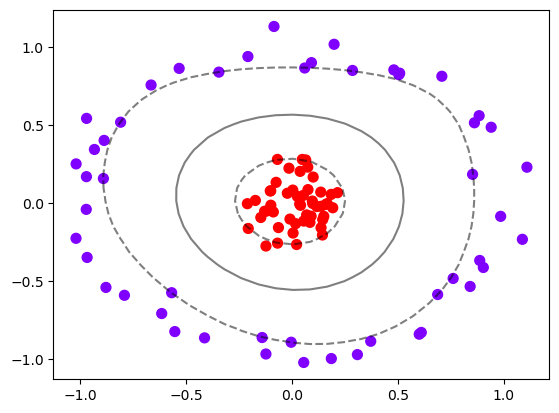

In [23]:
# 用rbf
clf = SVC(kernel='rbf').fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')
plot_svc_decision_function(clf)

#### 核函数在不同数据集的表现

In [24]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0)
    , make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1)
    , make_blobs(n_samples=n_samples, centers = 2, random_state=5)
    , make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)
]
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']

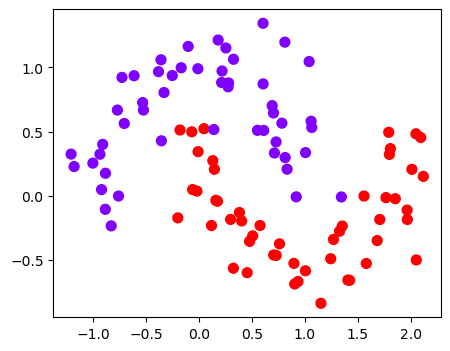

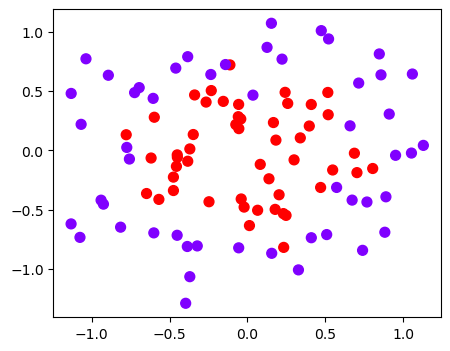

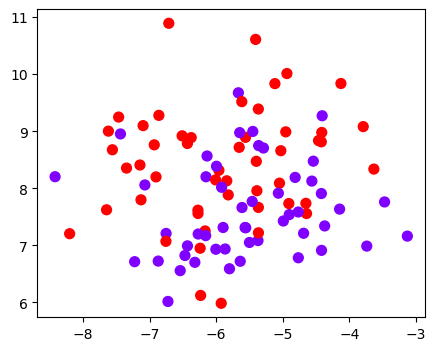

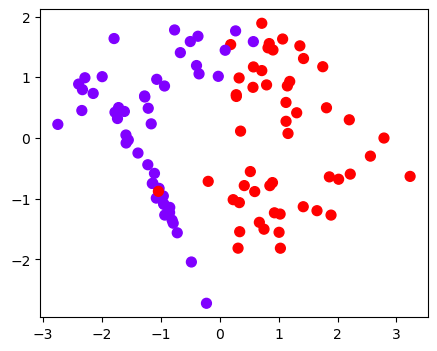

In [25]:
for x, y in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'rainbow')

In [26]:
[*enumerate(datasets)]

[(0,
  (array([[-1.09443462e-02,  9.89784876e-01],
          [ 1.96749886e+00, -1.10921978e-01],
          [ 9.18923151e-01, -7.87831621e-03],
          [-1.97813183e-02,  3.67422878e-02],
          [ 8.97047211e-01, -5.26043067e-01],
          [ 2.05087697e+00,  4.82966687e-01],
          [ 5.52592656e-01,  5.10008493e-01],
          [ 9.36108682e-01, -6.67176177e-01],
          [-8.57905150e-03,  3.44030710e-01],
          [ 1.79962867e+00,  3.22578165e-01],
          [-1.79739813e-01,  5.12417381e-01],
          [ 1.96928635e+00, -1.84060982e-01],
          [ 1.40757108e+00, -6.55885144e-01],
          [ 1.04103920e+00,  1.04537944e+00],
          [ 6.11861752e-01,  5.09315861e-01],
          [-3.59476500e-01,  1.05930036e+00],
          [ 2.54029695e-01,  1.15116524e+00],
          [ 2.13555501e-01,  8.82321641e-01],
          [-3.30880800e-01,  8.04221145e-01],
          [ 1.06603845e+00,  5.32174106e-01],
          [-7.06988363e-01,  5.63246401e-01],
          [ 4.02928450e-01, -

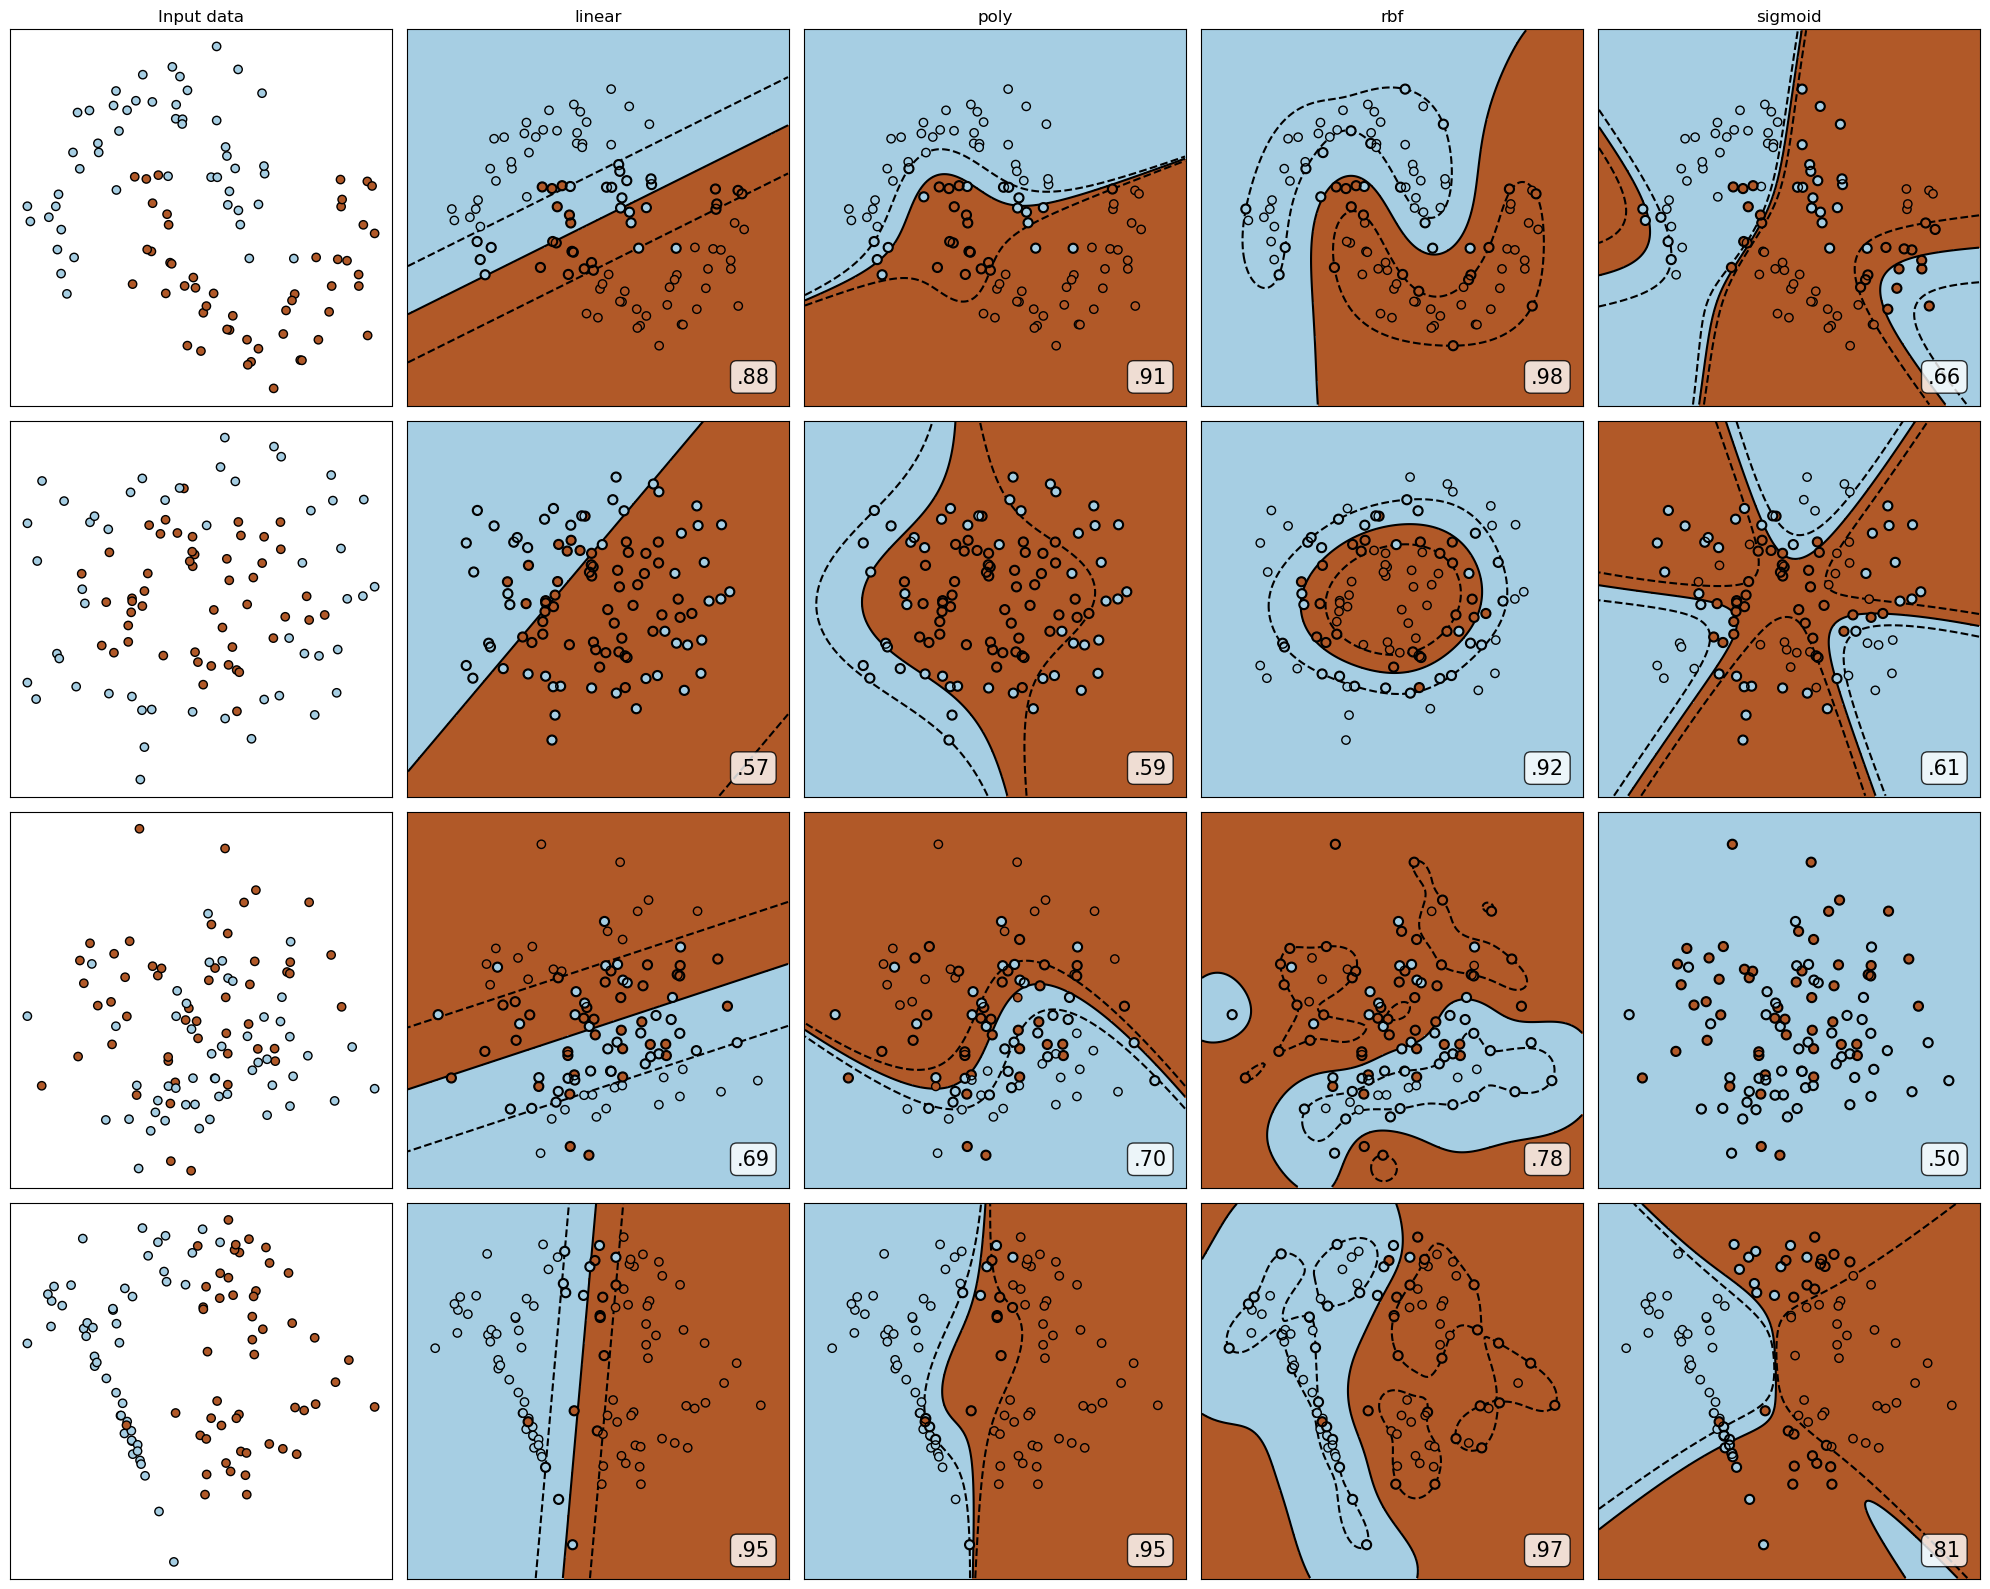

In [27]:
# 需要观察原图和四个核函数的表现效果
# 需要5*4个图
nrows = len(datasets)
ncols = len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols, figsize = (20, 16))

# 第一层循环：在不同数据集中循环
for ds_cnt, (x, y) in enumerate(datasets):
    # 图像第一列是原数据
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title('Input data')
    ax.scatter(x[:, 0], x[:, 1], c = y, zorder = 10, cmap = plt.cm.Paired, edgecolors='k')
    ax.set_xticks([])
    ax.set_yticks([])

    # 第二层循环：在不同的核函数中循环
    # 从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        ax = axes[ds_cnt, est_idx + 1]
        clf = SVC(kernel=kernel, gamma=2).fit(x, y)
        score = clf.score(x, y)

        # 绘制本身分布的散点图
        ax.scatter(x[:, 0], x[:, 1], c = y, zorder = 10
                   , cmap = plt.cm.Paired, edgecolors = 'k')
        
        # 绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 50
                   , facecolors = 'none', zorder = 10, edgecolors = 'k')
        
        # 绘制决策边界
        x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
        y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        # 填充等高线不同区域的颜色
        ax.pcolormesh(xx, yy, z > 0, cmap = plt.cm.Paired)
        # 绘制等高线
        ax.contour(xx, yy, z, colors = ['k', 'k', 'k']
                   , linestyles = ['--', '-', '--']
                   , levels = [-1, 0, 1])
        
        ax.set_xticks([])
        ax.set_yticks([])

        # 将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
        
        # 为每张图片添加分类的分数
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size =15
                , bbox = dict(boxstyle = 'round', alpha = 0.8, facecolor = 'white')
                , transform = ax.transAxes
                , horizontalalignment = 'right')
        



plt.tight_layout()
plt.show()


# rbf好用

### 核函数的优势劣势

在SVM执行前，请进行数据无量化处理

In [28]:
data = load_breast_cancer()
x = data.data
y = data.target
x, x.shape, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 (569, 30),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1

In [29]:
np.unique(y)

array([0, 1])

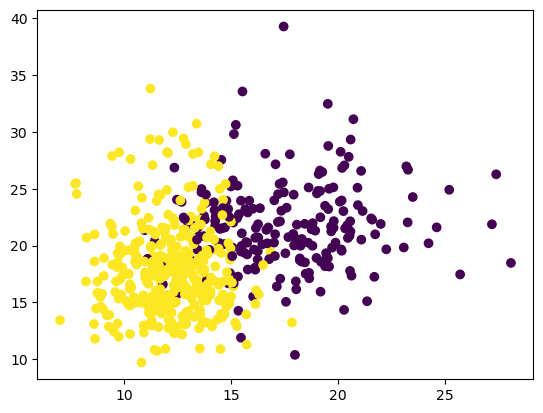

In [30]:
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [31]:
# pca降维
x_de = PCA(2).fit_transform(x)
x_de

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

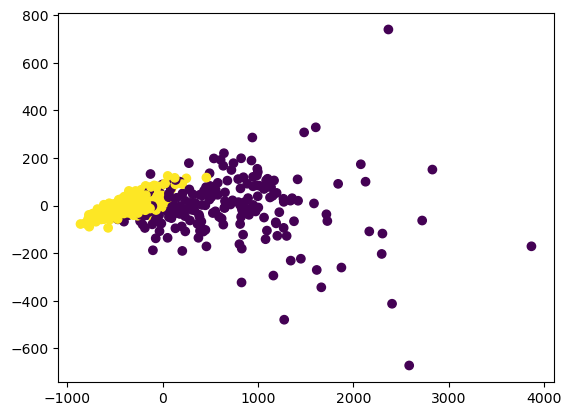

In [32]:
plt.scatter(x_de[:, 0], x_de[:, 1], c = y)
plt.show()

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
Kernel = ['linear', 'rbf', 'sigmoid'] # 不要poly 因为要跑超级超级久
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel= kernel, gamma = 'auto'
            #  , degree = 1
            , cache_size=5000
            ).fit(xtrain, ytrain)
    
    print('The accuracy under kernel %s is % f' %(kernel, clf.score(xtest, ytest)))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is  0.964912
00:01:908072
The accuracy under kernel rbf is  0.631579
00:00:071647
The accuracy under kernel sigmoid is  0.631579
00:00:009314


我们可以有两个发现。首先，乳腺癌数据集是一个线性数据集，线性核函数跑出来的效果很好。rbf和sigmoid两个擅长非线性的数据从效果上看完全不可用。其次，线性核函数的运行速度远远不如非线性的两个核函数。

In [34]:
# 既然线性可以表现很好，我们直接把多项式核的degree参数调整为1
Kernel = ['linear', 'poly', 'rbf', 'sigmoid'] # 不要poly 因为要跑超级超级久
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel= kernel, gamma = 'auto'
            , degree = 1
            , cache_size=5000
            ).fit(xtrain, ytrain)
    
    print('The accuracy under kernel %s is % f' %(kernel, clf.score(xtest, ytest)))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime('%M:%S:%f'))


# 现在多项式速度远远快于linear
# 为什么rbf跑出来效果不尽如人意呢
# 真正问题是数据量纲问题。
# 回忆一下我们如何求解决策边界，如何判断点是否在决策边界的一边？
# 是靠计算“距离”。虽然我们不能说SVM是完全的距离类模型，但是它严重收到数据量纲的影响。


The accuracy under kernel linear is  0.964912
00:02:252791
The accuracy under kernel poly is  0.964912
00:00:128874
The accuracy under kernel rbf is  0.631579
00:00:081872
The accuracy under kernel sigmoid is  0.631579
00:00:008267


In [35]:
# 让我们来探索一下乳腺癌数据集的量纲
data = pd.DataFrame(x)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

# 数据量纲不统一
# 看0.01和min的差异 以及 0.99和max的差异 观察数据是否存在偏态问题


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [36]:
# 进行数据标准化
x_std = StandardScaler().fit_transform(x)
data = pd.DataFrame(x_std)
data.describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.99]).T


,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x_std, y, test_size=0.3, random_state=420)

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel
              , gamma = 'auto'
              , degree=1
              , cache_size=5000
              ).fit(xtrain, ytrain)
    
    print('The accuracy under kernrl %s is %f' % (kernel, clf.score(xtest, ytest)))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime('%M:%S:%f'))

# 发现速度明显加快 而且得分明显变高

The accuracy under kernrl linear is 0.976608
00:00:013997
The accuracy under kernrl poly is 0.964912
00:00:011444
The accuracy under kernrl rbf is 0.970760
00:00:014472
The accuracy under kernrl sigmoid is 0.953216
00:00:008009


### 核函数的调参

虽然线性核函数的效果是最好的，但它是没有核函数相关参数可以调整的，rbf和多项式却有着可以调整的参数，接下来我们就来看看这些参数。

| 输入      | 含义    | 解决问题   | 核函数的表达式                       | 参数 gamma | 参数 degree | 参数coef0 |
| :-------- | :------ | :--------- | :----------------------------------- | :--------- | :---------- | :---- |
| "linear"  | 线性核  | 线性       | $K(x,y) = x^T \cdot y = x \cdot y$   | No         | No          | No    |
| "poly"    | 多项式核 | 偏线性     | $K(x,y) = (\gamma(x \cdot y) + r)^d$ | Yes        | Yes         | Yes   |
| "sigmoid" | 双曲正切核 | 非线性     | $K(x,y) = tanh(\gamma(x \cdot y) + r)$ | Yes        | No          | Yes   |
| "rbf"     | 高斯径向基 | 偏非线性   | $K(x,y) = e^{-\gamma\|x-y\|^2}, \gamma > 0$ | Yes        | No          | No    |

| 参数    | 含义                                                                                                                                                                                          |
| :------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| degree  | 整数，可不填，默认3<br>多项式核函数的次数（'poly'），如果核函数没有选择"poly"，这个参数会被忽略                                                                                                  |
| gamma   | 浮点数，可不填，默认"auto"<br>核函数的系数，仅仅在参数`kernel`的选项为"rbf", "poly"和"sigmoid"的时候有效<br>输入"auto"，自动使用`1/n_features`作为`gamma`的取值<br>输入"scale"，则使用`1/(n_features * X.std())`作为`gamma`的取值<br>输入"auto_deprecated"，则表示没有明确的`gamma`值（不推荐使用） |
| coef0   | 浮点数，可不填，默认`0.0`<br>核函数中的常数项，它只在参数`kernel`为`'poly'`和`'sigmoid'`的时候有效。                                                                                        |

使用学习曲线或者网格搜索来帮助我们查找最佳的参数组合

In [38]:
score = []
gamma_range = np.logspace(-10, 1, 50)
gamma_range

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

0.9766081871345029 0.012067926406393264


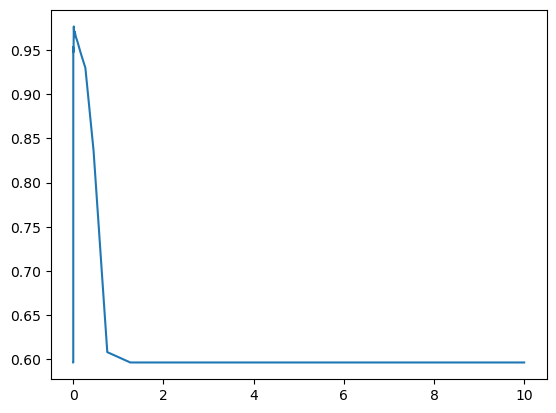

In [39]:
# rbf学习曲线
for i in gamma_range:
    clf = SVC(kernel='rbf', gamma=i, cache_size=5000).fit(xtrain, ytrain)
    score.append(clf.score(xtest, ytest))

print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()

In [ ]:
# time warning
# poly网格搜索
# degree我们已经知道应该选1
time0 = time()
gamma_range = np.logspace(-10, 1, 20)
coef0_range = np.linspace(0, 5, 10)

param_grid = dict(gamma = gamma_range
                  , coef0 = coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel='poly', degree = 1, cache_size = 5000)
                    , param_grid=param_grid
                    , cv = cv)
grid.fit(x, y)

print('The best parameters are %s with a score of %0.5f' % (grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time() - time0).strftime('%M:%S:%f'))

The best parameters are {'coef0': 4.444444444444445, 'gamma': 10.0} with a score of 0.96140
09:26:524982


# 软间隔数据集

#### 惩罚系数C

0.9766081871345029 1.2340816326530613


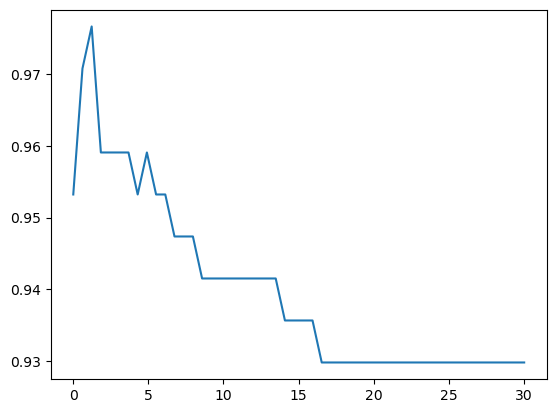

In [40]:
# 调线性核函数
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel='linear', C = i, cache_size=5000).fit(xtrain, ytrain)
    score.append(clf.score(xtest, ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()


0.9766081871345029 0.2136734693877551


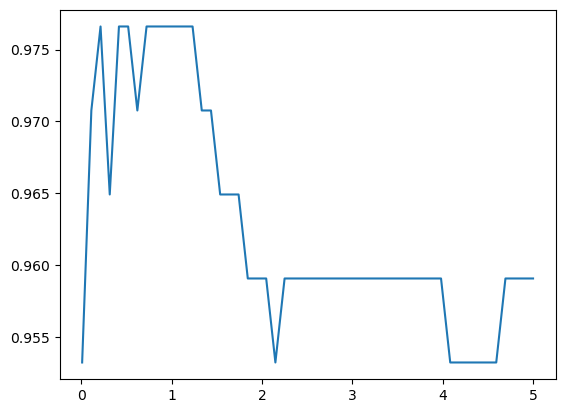

In [41]:
# 细化
score = []
C_range = np.linspace(0.01, 5, 50)
for i in C_range:
    clf = SVC(kernel='linear', C = i, cache_size=5000).fit(xtrain, ytrain)
    score.append(clf.score(xtest, ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9883040935672515 25.103673469387758


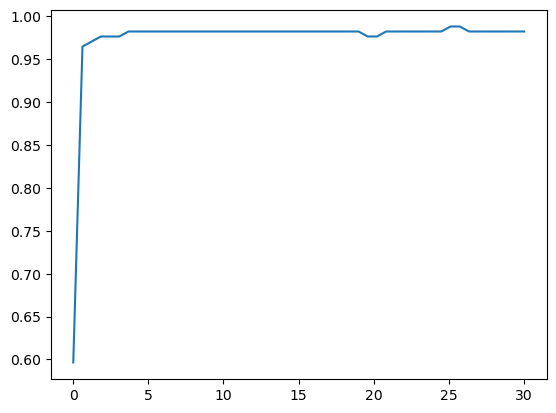

In [42]:
# rbf
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel='rbf', C = i, cache_size=5000).fit(xtrain, ytrain)
    score.append(clf.score(xtest, ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9883040935672515 24.979591836734695


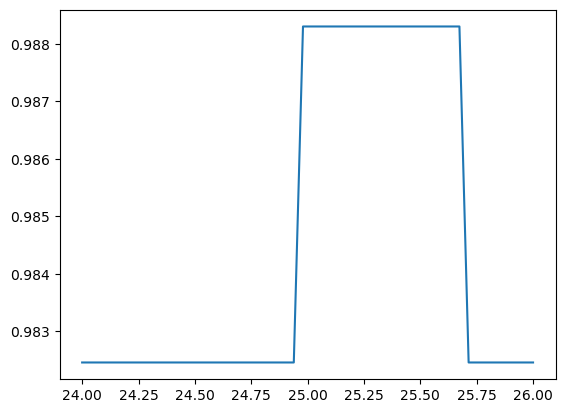

In [43]:
# 细化
score = []
C_range = np.linspace(24, 26, 50)
for i in C_range:
    clf = SVC(kernel='rbf', C = i, cache_size=5000).fit(xtrain, ytrain)
    score.append(clf.score(xtest, ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

现在我们可以说我们找到了乳腺癌数据集上的最优解：rbf核函数下0.9883的正确率。后续我们还可以使用交叉验证、特征工程来进行进一步优化。

# 二分类样本不均衡问题

在逻辑回归中，我们采用上采样下采样，来增加样本总数以达到使样本平衡的问题。但是SVM中，样本数量很影响计算的速度，我们并不想轻易地增加样本的数量。况且，SVM的决策仅仅受决策边界的影响，而决策边界仅仅受参数C和支持向量的影响，单纯地增加样本数量不仅增加计算时间，肯还会增加无数对决策边界没有影响的样本点。因此在SVM中，我们大力依赖我们调节样本均衡的参数：class_weight和接口fit中可以设定的sample_weight


### SVC 的参数：`class_weight`
`class_weight` 参数主要用于处理**类别不平衡 (Class Imbalance)** 的情况。当数据集中不同类别的样本数量差异很大时，模型可能会偏向于数量较多的类别。

* **输入类型：**
    * **字典 (Dictionary)**：
        你可以手动为每个类别设置一个权重。例如：
        ```python
        # 示例：假设 'label_1' 和 'label_2' 是你的类别标签
        class_weight_dict = {"label_1": weight_1 * C, "label_2": weight_2 * C}
        ```
        其中 `C` 是 SVC 模型本身的正则化参数。`class_weight` 的值会与 `C` 相乘，从而调整每个类别的惩罚强度。给少数类别设置更高的权重，可以迫使模型更关注这些类别。

    * **"balanced" 字符串**：
        当设置为 `"balanced"` 时，模型会自动根据数据中各个类别的样本频率来调整权重。
        其计算方式通常是：
        $$
        \text{weight for class } k = \frac{\text{总样本数}}{\text{类别数} \times \text{类别 } k \text{ 的样本数}}
        $$
        这意味着样本数量越少的类别，其权重会自动设置得越高，以平衡不同类别对损失函数的贡献。

    * **不填 (None / 默认值)**：
        默认情况下，所有类别的权重都被视为 `1`。模型会根据原始样本的状况进行训练，不特别偏向任何类别。适用于数据集平衡或不需要特殊处理不平衡的情况。

* **作用：**
    通过调整不同类别的权重，可以改变模型在训练时对不同类别样本错误分类的惩罚程度，从而使模型更关注那些权重较高的类别（通常是少数类别），提高对少数类的识别能力。

### SVC 的接口 `fit` 的参数：`sample_weight`

`sample_weight` 参数允许你为数据集中的**每个单独的样本**设置一个权重。

* **输入类型：**
    一个与样本数量相同的数组 (Array)，形状为 `(n_samples,)`。数组中的每个元素对应一个样本的权重。

* **作用：**
    * **单个样本的重要性：** 每个样本在 `fit()` 训练时的权重会影响它对模型学习的贡献程度。权重越大的样本，模型在处理它时会给予更高的关注。
    * **调整惩罚项：** 这个权重会与该样本对应的 `C` 值（正则化参数）相乘。这意味着权重越高的样本，在模型构建决策边界时，对其错误分类的惩罚也越大。
    * **强调特定样本：** 较大的权重通常会赋予你认为更重要或更需要模型精确识别的样本（例如，少数类别中的关键样本），从而迫使模型决策方向更倾向于正确分类这些被加权的样本。

---
### 3. `class_weight` 和 `sample_weight` 的共同影响

* 通常情况下，你只会选择设置 `class_weight` 或 `sample_weight` 中的一个，因为它们都能实现对样本重要性的调整。
* **如果你同时设置了这两个参数，模型的 `C` 参数会同时受到两者的影响。**
* 最终作用于每个样本的有效权重可以理解为：
    $$
    \text{有效权重} = \text{class\_weight 设置的类别权重} \times \text{sample\_weight 设置的样本权重} \times \text{SVC 模型的正则化参数 } C
    $$
    这意味着它们会叠加效应，共同决定每个样本在训练过程中对决策边界的影响力。



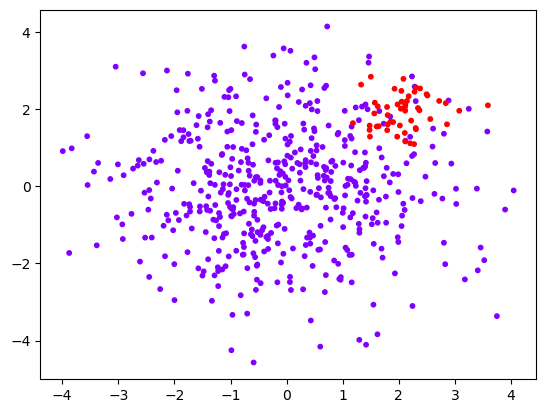

In [44]:
# class_weight
class_1 = 500
class_2 = 50
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
x, y = make_blobs(n_samples=[class_1, class_2]
                  , centers=centers
                  , cluster_std=clusters_std
                  , random_state=0
                  , shuffle=False)

plt.scatter(x[:, 0], x[:, 1], c = y, cmap='rainbow', s = 10)


In [45]:
# 在数据集上分别建模
clf = SVC(kernel='linear').fit(x, y)
weightclf = SVC(kernel='linear', class_weight={1: 10}).fit(x, y)

In [46]:
clf.score(x, y), weightclf.score(x, y)
# Accuracy

(0.9418181818181818, 0.9127272727272727)

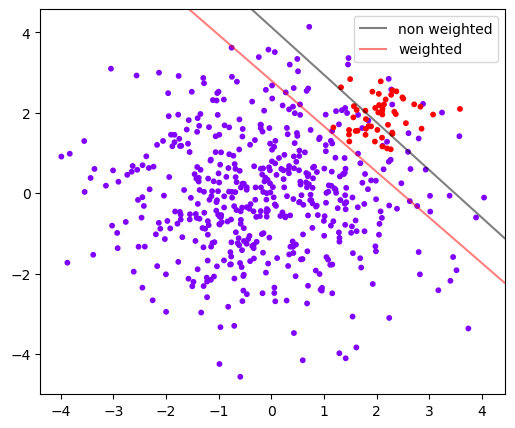

'\n可以看出，从准确率的角度来看，不做样本平衡的时候准确率反而更高，做了样本平衡准确率反而变低了，\n这是因为做了样本平衡后，为了要更有效地捕捉出少数类，模型误伤了许多多数类样本，而多数类被分错的样本数量>少数类被分类正确的样本数量，使得模型整体的精确性下降。\n现在，如果我们的目的是模型整体的准确率，那我们沋要拒绝样本平衡，使用class_weight被设置之前的模型。\n然而在现实中，我们往往都在追求捕捉少数类，因为在很多情况下，将少数类判断错的代价是巨大的。\n比如我们之前提到的，判断潜在犯罪者和普通人的例子，如果我们没有能够识别出潜在犯罪者，那么这些人就可能去危害社会，造成恶劣影响，但如果我们把普通人错认为是潜在犯罪者，我们也许只是需要增加一些监控和人为甄别的成本。\n所以对我们来说，我们宁愿把普通人判错，也不想放过任何一个潜在犯罪者。我们希望不惜一切代价来捕获!数类，或者希望捕捉出尽量多的少数类，那我们就必须使用class_weight设置后的模型。\n'

In [48]:
# 绘制决策边界
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c = y, cmap='rainbow', s = 10)
ax = plt.gca()

# 绘制网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 找出样本点到决策边界的距离
zclf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, zclf, colors = 'black', levels = [0], alpha = 0.5, linestyles = ['-'])

zwclf = weightclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, zwclf, colors = 'red', levels = [0], alpha = 0.5, linestyles = ['-'])

# 图例
handles_a, _ = a.legend_elements()
handles_b, _ = b.legend_elements()

plt.legend([handles_a[0], handles_b[0]], ['non weighted', 'weighted'], loc='upper right')
plt.show()

# 作了样本均衡之后，我们可以正确捕捉少数类了，但是也“误杀”了一大堆的多数点
'''
可以看出，从准确率的角度来看，不做样本平衡的时候准确率反而更高，做了样本平衡准确率反而变低了，
这是因为做了样本平衡后，为了要更有效地捕捉出少数类，模型误伤了许多多数类样本，而多数类被分错的样本数量>少数类被分类正确的样本数量，使得模型整体的精确性下降。
现在，如果我们的目的是模型整体的准确率，那我们沋要拒绝样本平衡，使用class_weight被设置之前的模型。
然而在现实中，我们往往都在追求捕捉少数类，因为在很多情况下，将少数类判断错的代价是巨大的。
比如我们之前提到的，判断潜在犯罪者和普通人的例子，如果我们没有能够识别出潜在犯罪者，那么这些人就可能去危害社会，造成恶劣影响，但如果我们把普通人错认为是潜在犯罪者，我们也许只是需要增加一些监控和人为甄别的成本。
所以对我们来说，我们宁愿把普通人判错，也不想放过任何一个潜在犯罪者。我们希望不惜一切代价来捕获!数类，或者希望捕捉出尽量多的少数类，那我们就必须使用class_weight设置后的模型。
'''

# SVM处理多分类问题

### 参数`decidion_function_shape`

In [49]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris # Iris 数据集是经典的3分类问题
import numpy as np

# 加载 Iris 数据集
iris = load_iris()
X = iris.data
y = iris.target # 0, 1, 2 三个类别
x, y

(array([[ 2.64607852,  0.60023581],
        [ 1.46810698,  3.3613398 ],
        [ 2.80133699, -1.46591682],
        ...,
        [ 3.07478727,  1.95487808],
        [ 2.36582946,  1.96725581],
        [ 2.17408462,  2.33162904]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [50]:

# --- 使用 'ovr' 策略 ---
clf_ovr = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
clf_ovr.fit(X, y)

# 查看 decision_function 的输出形状
ovr_df_output = clf_ovr.decision_function(X[:5]) # 取前5个样本
print(f"OVR 策略下 decision_function 的输出形状: {ovr_df_output.shape}")
# 预期形状: (n_samples, n_classes) -> (5, 3)
print("OVR decision_function 输出示例 (前5个样本):\n", ovr_df_output)
# 每一列对应一个类别 (0, 1, 2) 的决策分数


OVR 策略下 decision_function 的输出形状: (5, 3)
OVR decision_function 输出示例 (前5个样本):
 [[ 2.24627744  1.2980152  -0.30616012]
 [ 2.23781119  1.29663601 -0.30453043]
 [ 2.24548583  1.2968967  -0.30542241]
 [ 2.23591041  1.29559718 -0.30371626]
 [ 2.24795778  1.29794432 -0.3062846 ]]


In [51]:

# --- 使用 'ovo' 策略 ---
clf_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)
clf_ovo.fit(X, y)

# 查看 decision_function 的输出形状
ovo_df_output = clf_ovo.decision_function(X[:5]) # 取前5个样本
print(f"\nOVO 策略下 decision_function 的输出形状: {ovo_df_output.shape}")
# 预期形状: (n_samples, n_classes * (n_classes - 1) / 2) -> (5, 3 * 2 / 2) -> (5, 3)
# 对于3个类别 (0, 1, 2)，有 3 个二分类器 (0 vs 1, 0 vs 2, 1 vs 2)
print("OVO decision_function 输出示例 (前5个样本):\n", ovo_df_output)
# 每一列对应一个两两分类器的决策分数


OVO 策略下 decision_function 的输出形状: (5, 3)
OVO decision_function 输出示例 (前5个样本):
 [[ 1.54397733  1.28498047  9.98200088]
 [ 1.29263764  1.19695449  9.37595117]
 [ 1.50643037  1.28802382  9.65473164]
 [ 1.25832902  1.16317909  9.09159192]
 [ 1.60072147  1.3035969  10.01984113]]
